In [1]:
!pip install scikit_plot

In [2]:
#imports
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform

from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score

import scikitplot as skplot

In [7]:
bank = pd.read_csv('CC GENERAL.csv')

In [8]:
#Lowercase the column names.
bank.columns = bank.columns.str.lower()

In [9]:
#Check how many null values and data type in each variable.
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [10]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
balance_frequency,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
purchases,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
oneoff_purchases,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
installments_purchases,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
cash_advance,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
purchases_frequency,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
oneoff_purchases_frequency,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
purchases_installments_frequency,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
cash_advance_frequency,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [11]:
bank.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


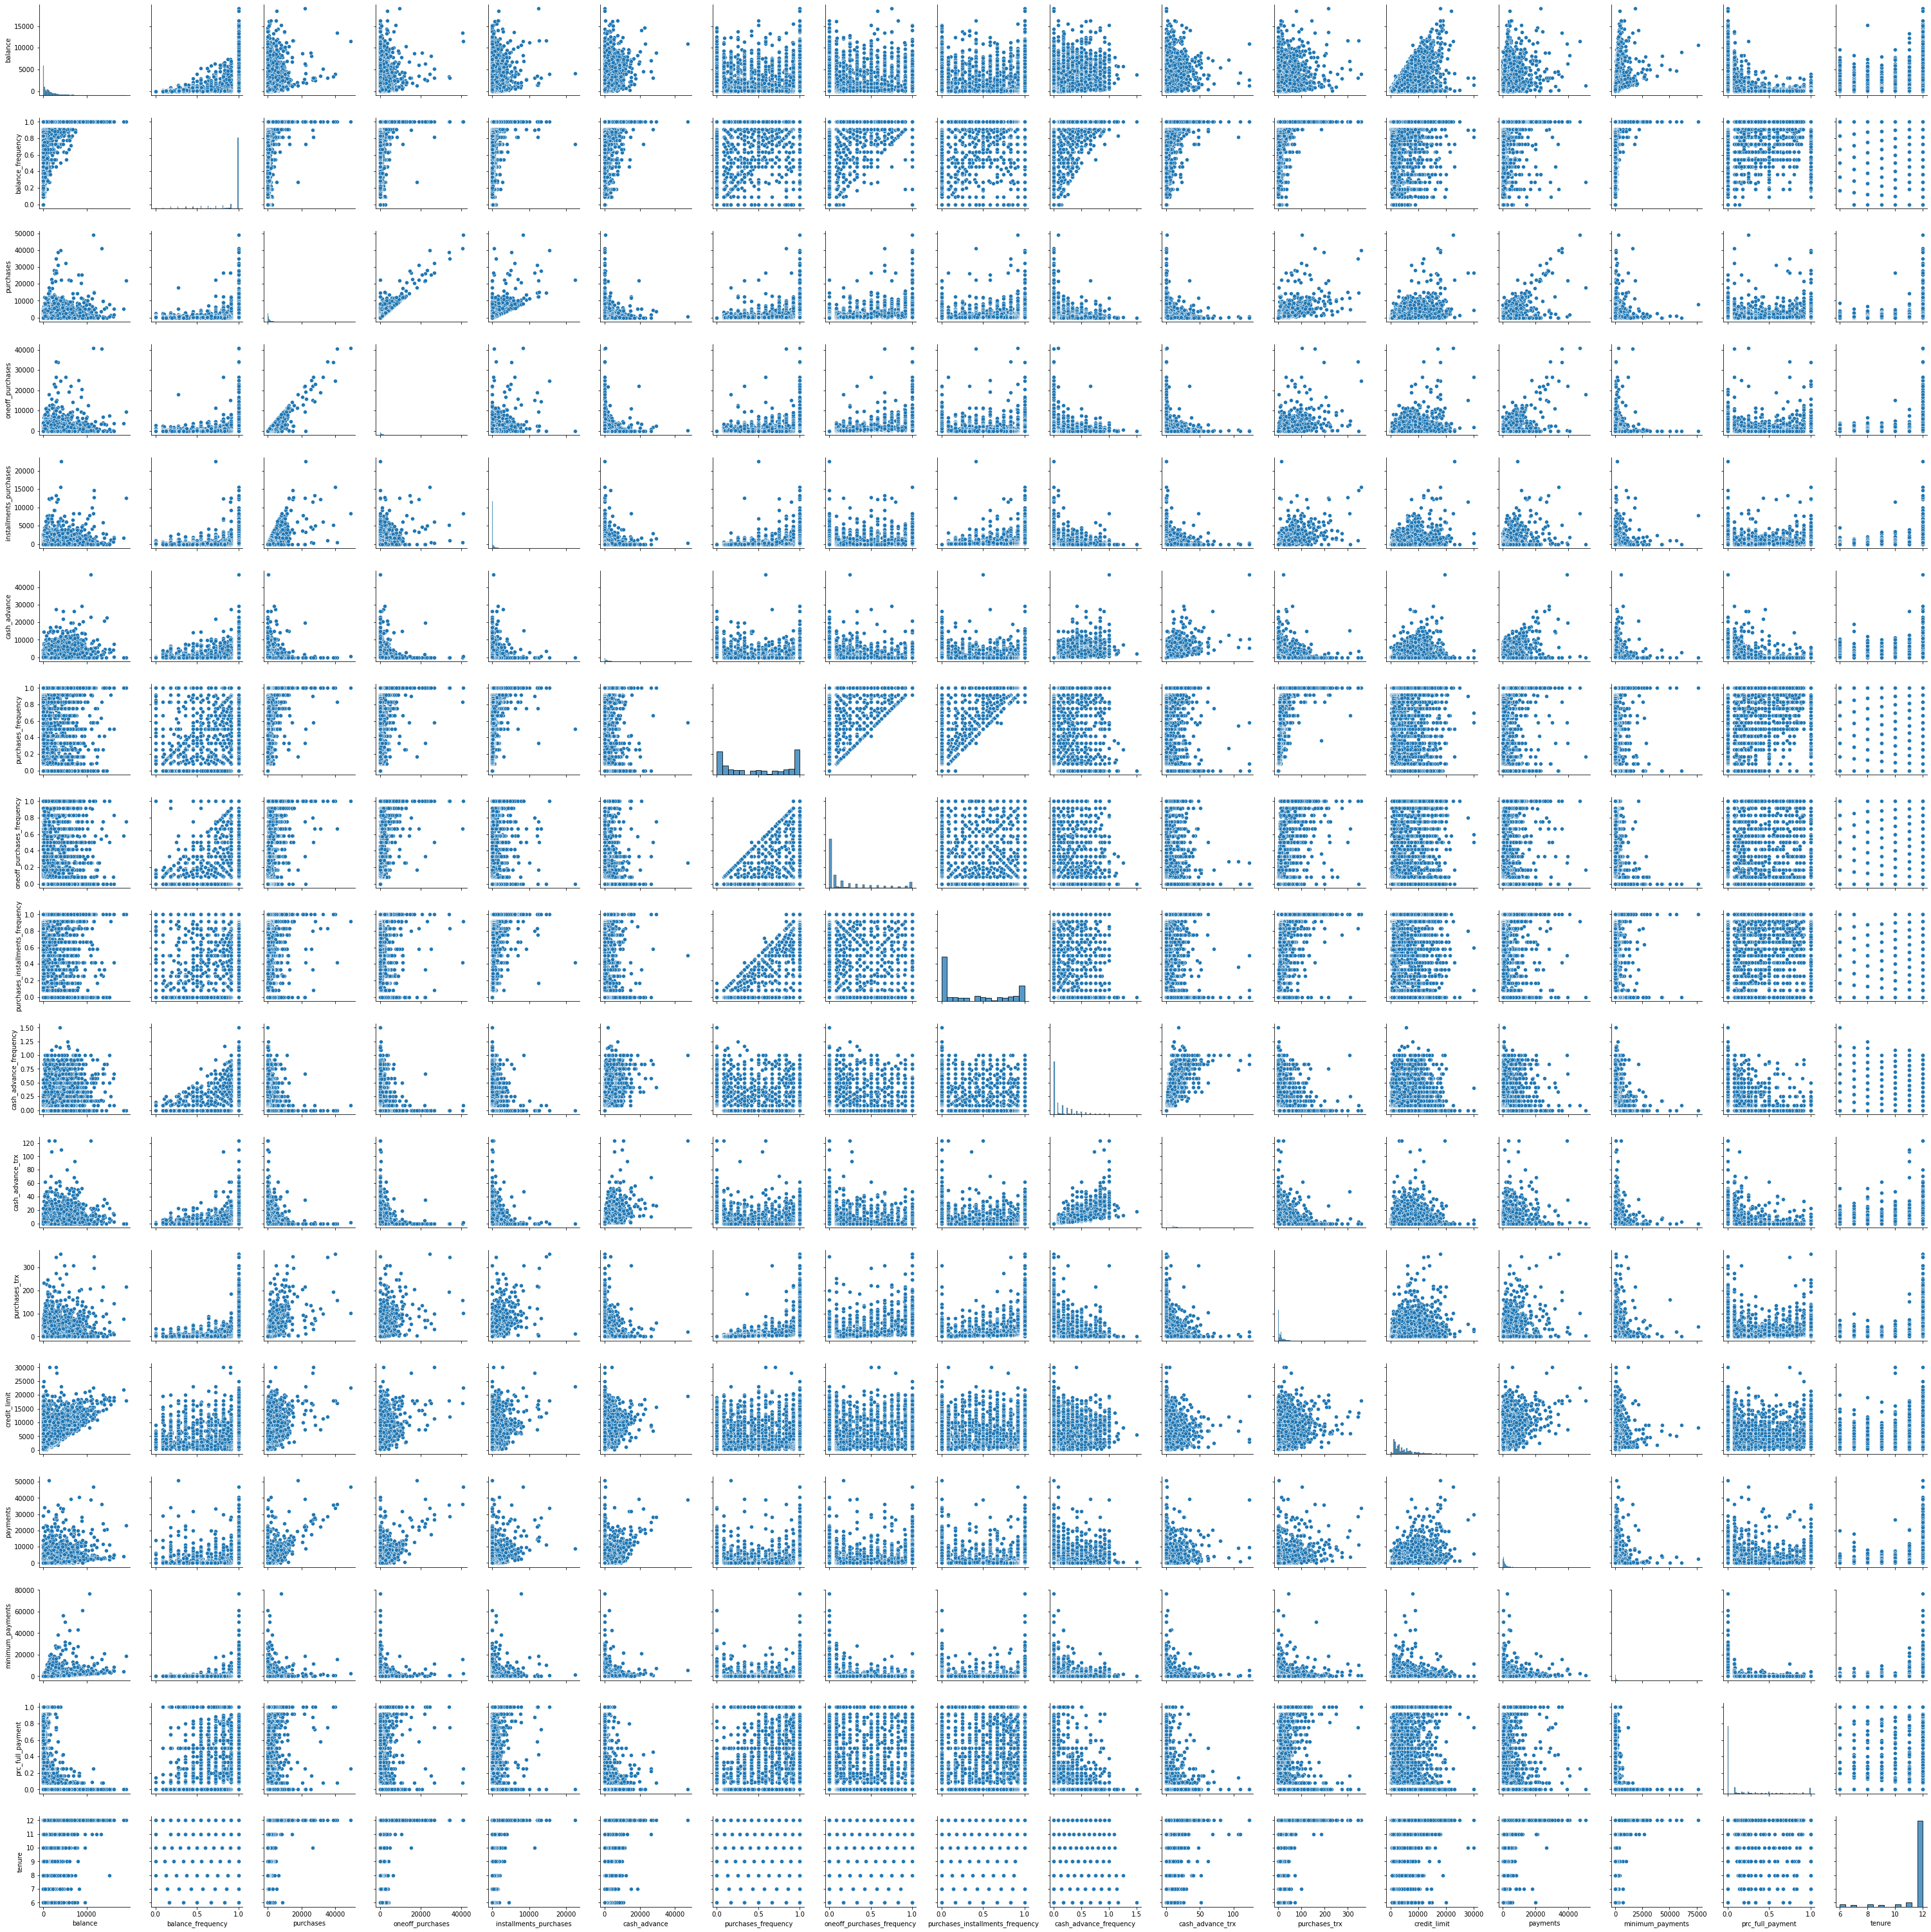

In [12]:
#Pairplot
sns.pairplot(data=bank)
plt.show()

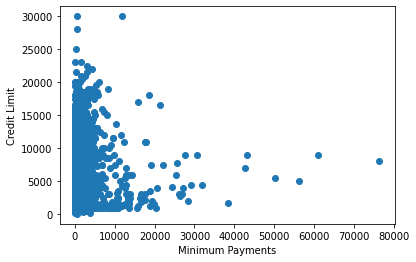

In [14]:
plt.scatter(bank['minimum_payments'], bank['credit_limit'])
plt.xlabel('Minimum Payments')
plt.ylabel('Credit Limit')
plt.show()

# minimum payments is minimum amount of payments for a purchase
# limit of credit card purchases
# It looks like the bank has identified people with multiple minimum payments as high risk.
# there seems to be a really low credit limit when minimum payments are very high to manage their risks since they have so much to pay off. 

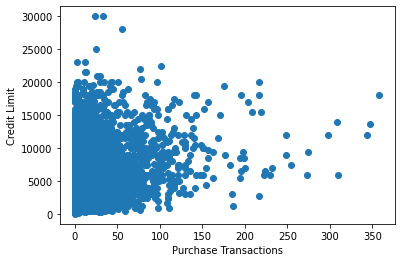

In [15]:
plt.scatter(bank['purchases_trx'], bank['credit_limit'])
plt.xlabel('Purchase Transactions')
plt.ylabel('Credit Limit')
plt.show()

# if you have a low number of transactions, your credit limit seems to be more likely to stay high. 
# however, if you use your credit card very often, the bank likely considers you to be high risk since there are so many things you must pay off
# therefore, the bank decreases your credit card limit
# the highest credit card limits exists on cards where the number of transactions are relatively low
# you're more likly to pay off a really high purchase if you only have a few transactions to pay off

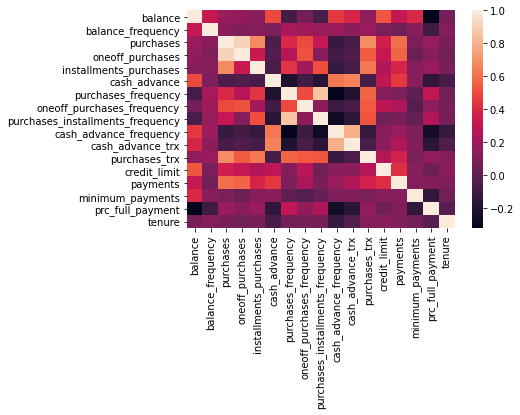

In [13]:
#Correlation between each variable.
bank_corr = bank.corr()
sns.heatmap(bank_corr)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


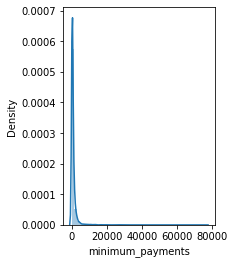

In [16]:
#Clean data
#There are 1 missing data in credit_limit and 313 missing data in minimum_payments.
#Since there is only one data missing in credit_limit, so we decided to drop it, but for the minimum_payments, we plotted the distribution first to see how the data looks like.
plt.subplot(1,2,2)
sns.distplot(bank.minimum_payments.dropna())
plt.show()

In [17]:
#Since the data is skewed to the right, we decided to use median fill the null value instead of the mean.
bank['minimum_payments'].fillna(bank['minimum_payments'].median(),inplace=True)

In [18]:
#Drop the missing value in credit_limit.
bank.dropna(inplace=True)

In [19]:
#Confirm that we fill all the missing values.
bank.isna().sum().sum()

0

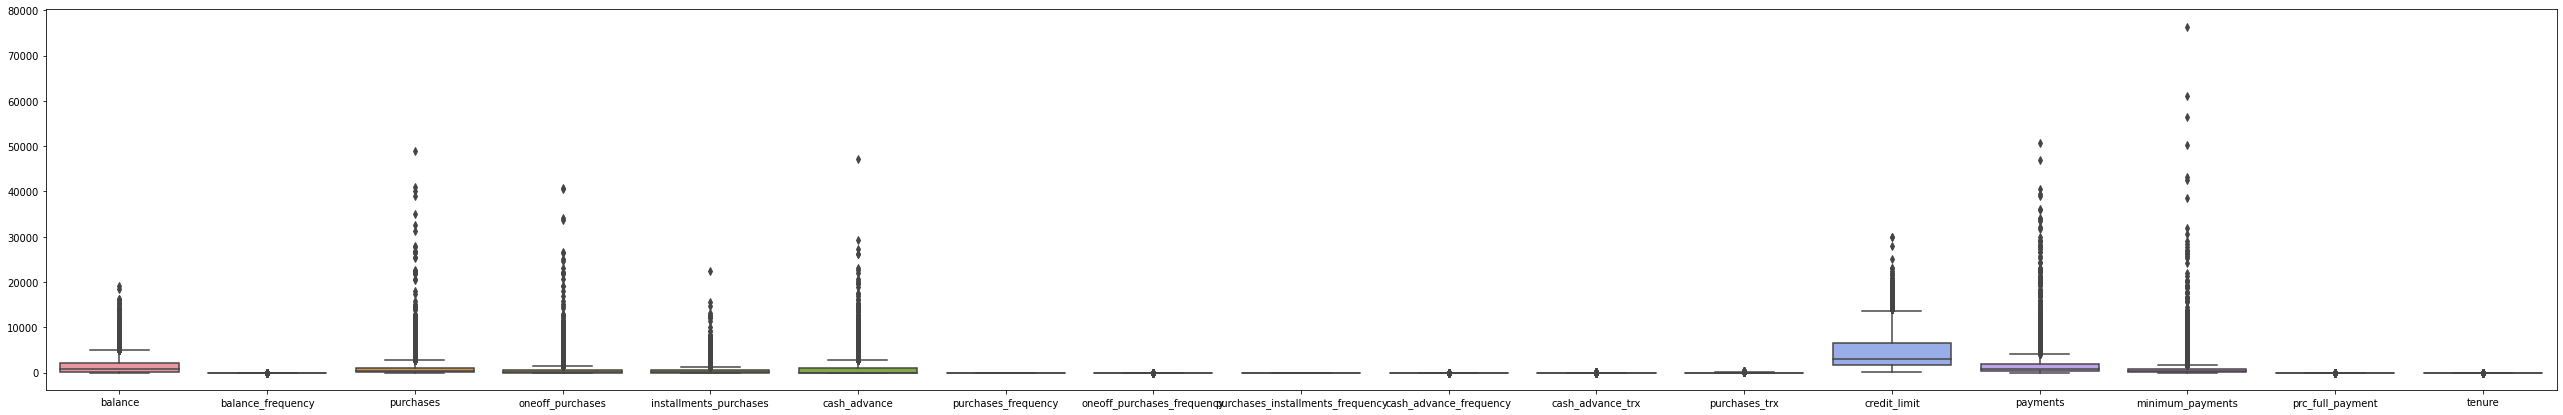

In [20]:
#We can find there are some outliers with several variables, but in this dataset we want to analyze all kind of customers, so we are not going to handle the outliers. 
plt.figure(figsize=(45,7))
sns.boxplot(data=bank)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


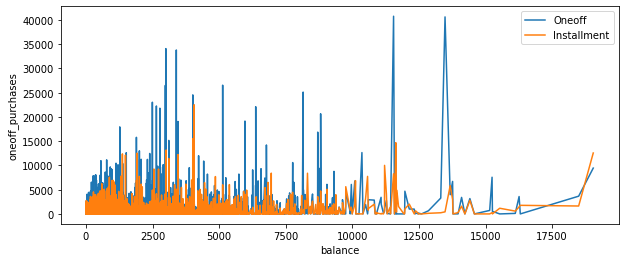

In [21]:
#Check if there is a relationship between different types of purchases. 
plt.figure(figsize=(10,4))
sns.lineplot(bank['balance'],bank['oneoff_purchases'],label='Oneoff')
sns.lineplot(bank['balance'],bank['installments_purchases'],label="Installment")
plt.show()

In [22]:
#Since the dendrogram can only have 1500 data each time, we randomly select 1500 data from original dataset.
bank_sample = bank.sample(n=1500)

In [23]:
#Keep only numerical data for the sample dataset.
bank_num = bank_sample.drop(columns = 'cust_id')

In [25]:
#Scale the data then put into dataframe for dendrogram.
sc = StandardScaler()
sb = sc.fit_transform(bank_num)
sb = pd.DataFrame(sb, columns = bank_num.columns)

In [26]:
#Check the data after scaler.
sb.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,4.430045,0.540879,3.042844,3.330122,1.167528,-0.473585,1.288077,2.121537,0.770460,-0.664525,-0.467866,1.654582,4.000568,0.237686,0.544395,-0.541605,0.347880
1,0.031740,0.540879,-0.474865,-0.360768,-0.495160,-0.310836,-1.219182,-0.674332,-0.920212,0.561019,-0.032777,-0.591172,-0.298267,-0.370081,-0.102780,-0.541605,0.347880
2,0.609779,0.540879,-0.474865,-0.360768,-0.495160,-0.401599,-1.219182,-0.674332,-0.920212,0.152506,-0.177806,-0.591172,-0.441561,-0.387500,0.112440,-0.541605,0.347880
3,2.202402,-0.131432,-0.474865,-0.360768,-0.495160,0.941574,-1.219182,-0.674332,-0.920212,5.054682,0.982431,-0.591172,0.418206,-0.420266,0.183061,-0.541605,-4.395932
4,-0.452850,0.540879,0.701442,0.755535,0.292969,-0.473585,0.034448,0.444015,-0.497544,-0.664525,-0.467866,-0.039583,-0.441561,-0.208888,-0.254237,-0.541605,0.347880


In [27]:
#Going to do euclidean,cosine, manhattan and jacard distance.
diste = pdist(sb.values)
distc = pdist(sb.values, metric='cosine')
distm = pdist(sb.values, metric='cityblock')
distj = pdist(sb.values, metric='jaccard')

In [28]:
hclust_e = linkage(diste)
hclust_c = linkage(distc)
hclust_m = linkage(distm)
hclust_j = linkage(distj)

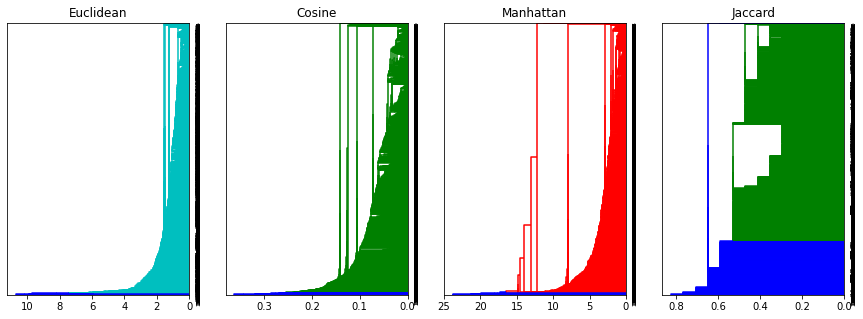

In [29]:
#Plot with euclidean, cosine, manhattan and jaccard method.
LINKS = [hclust_e, hclust_c, hclust_m, hclust_j]
TITLE = ['Euclidean', 'Cosine','Manhattan','Jaccard']

plt.figure(figsize=(15,5))

#Loop and build our plot.
for i, m in enumerate(LINKS):
  plt.subplot(1,4,i+1)
  plt.title(TITLE[i])
  dendrogram(m,
             #labels = ps.index
             leaf_rotation=90,
             # leaf_font_size=10,
             orientation='left')
plt.show()

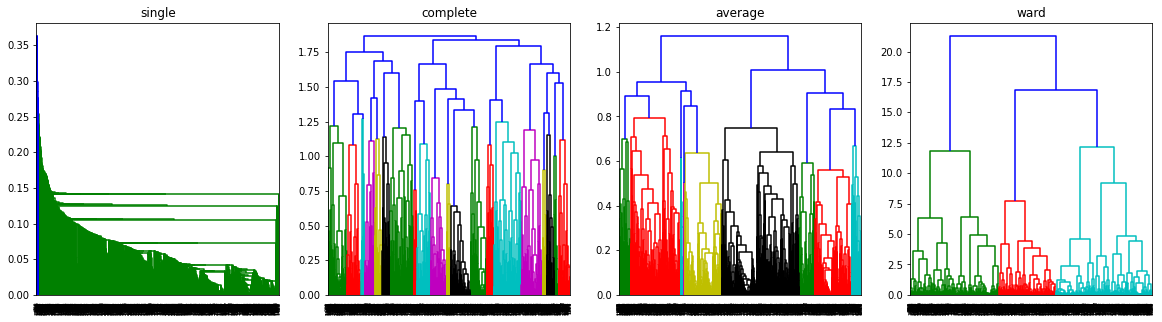

In [30]:
#Plot with single, complete, average, ward methods with cosine since the plot for cosine is the best among others.
METHODS = ['single', 'complete', 'average','ward']
plt.figure(figsize=(20,5))

for i, m in enumerate(METHODS):
  plt.subplot(1,4,i+1)
  plt.title(m)
  dendrogram(linkage(distc, method=m),
             leaf_rotation=90)
plt.show()

In [31]:
#Keep only numerical data for the original dataset.
bank_num2 = bank.drop(columns = 'cust_id')

In [32]:
#Scale the original data then put into dataframe for clustering.
sc = StandardScaler()
sb2 = sc.fit_transform(bank_num2)
sb2 = pd.DataFrame(sb2, columns = bank_num2.columns)

In [33]:
diste2 = pdist(sb2.values)
distc2 = pdist(sb2.values, metric='cosine')
distm2 = pdist(sb2.values, metric='cityblock')
distj2 = pdist(sb2.values, metric='jaccard')

In [34]:
hclust_e2 = linkage(diste2)
hclust_c2 = linkage(distc2)
hclust_m2 = linkage(distm2)
hclust_j2 = linkage(distj2)

In [35]:
#Use the plot above and consider the silhouette plot, I am going to use average with 5 and 9 clusters.
labs5a = fcluster(linkage(distc2, method='average'), 5, criterion='maxclust')
labs9a = fcluster(linkage(distc2, method='average'), 9, criterion='maxclust')

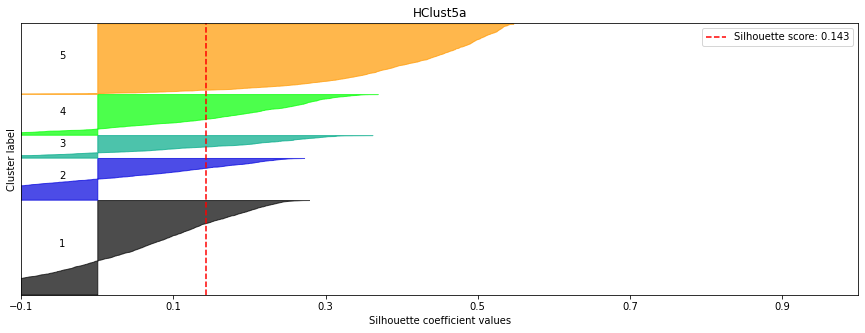

In [36]:
#Find the silhouette score with hierarchical clustering for 5 clusters with average method.  
skplot.metrics.plot_silhouette(sb2, labs5a, title="HClust5a", figsize=(15,5))
plt.show()

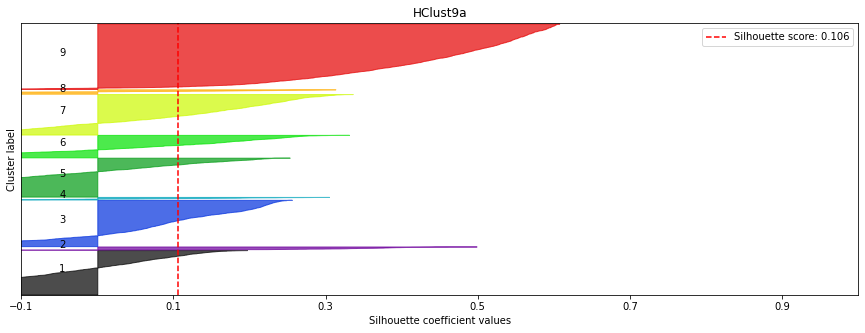

In [37]:
#Find the silhouette score with hierarchical clustering for 9 clusters with average method.  
skplot.metrics.plot_silhouette(sb2, labs9a, title="HClust9a", figsize=(15,5))
plt.show()

In [38]:
#Kmean
KS = range(2,30)

#Storage
inertia = []
silo = []

for k in KS:
    km = KMeans(k)
    km.fit(sb2)
    labs = km.predict(sb2)
    inertia.append(km.inertia_)
    silo.append(silhouette_score(sb2,labs))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


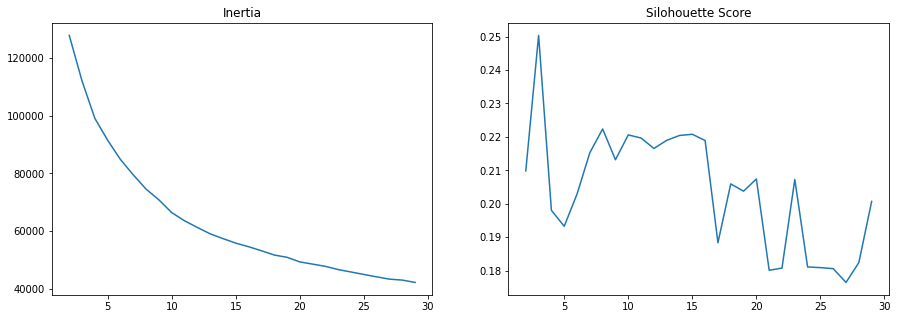

In [39]:
#Plot both inertia and silhouette score to find a better k value.
plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
plt.title("Inertia")
sns.lineplot(KS, inertia)

plt.subplot(1, 2, 2)
plt.title("Silhouette Score")
sns.lineplot(KS, silo)

plt.show()

In [40]:
k4 = KMeans(4)
k4.fit(sb2)
k4_labs = k4.predict(sb2)

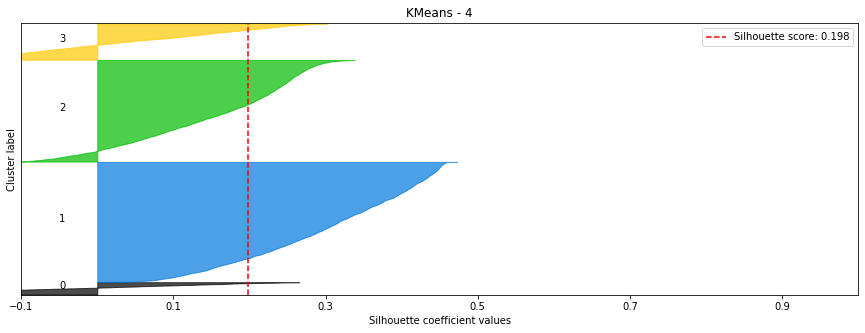

In [41]:
#Find the silhouette score with K-Means 4.
skplot.metrics.plot_silhouette(sb2,k4_labs , title="KMeans - 4", figsize=(15,5))
plt.show()

In [42]:
k5 = KMeans(5)
k5.fit(sb2)
k5_labs = k5.predict(sb2)

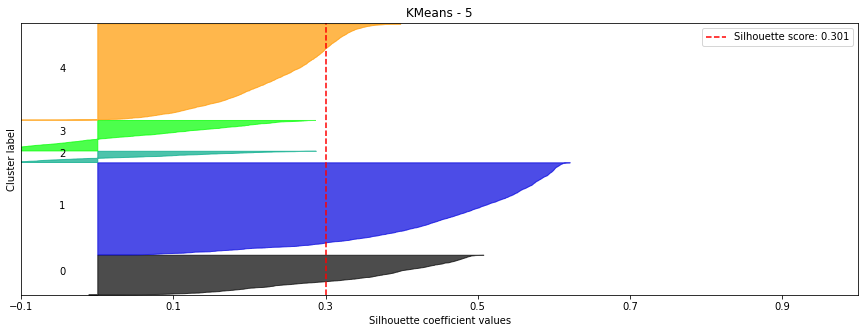

In [ ]:
#Find the silhouette score with K-Means 5. 
skplot.metrics.plot_silhouette(sb2,k5_labs , title="KMeans - 5", figsize=(15,5))
plt.show()

In [43]:
k6 = KMeans(6)

k6.fit(sb2)
k6_labs = k6.predict(sb2)

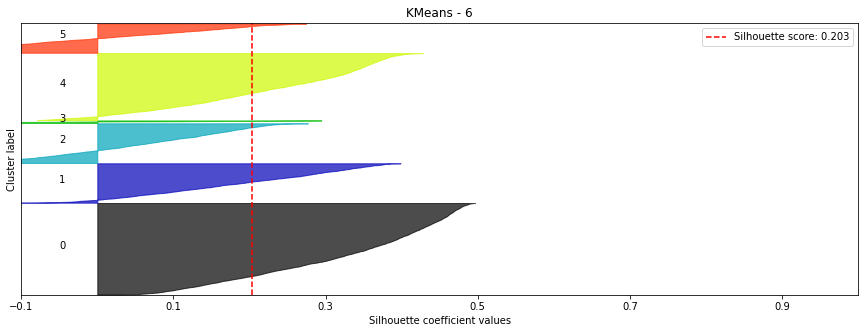

In [44]:
#Find the silhouette score with K-Means 6. 
skplot.metrics.plot_silhouette(sb2,k6_labs , title="KMeans - 6", figsize=(15,5))
plt.show()

In [45]:
k9 = KMeans(9)
k9.fit(sb2)
k9_labs = k9.predict(sb2)

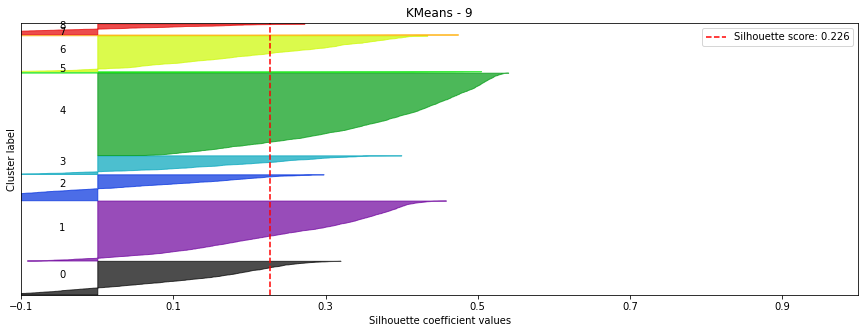

In [46]:
#Find the silhouette score with K-Means 9. 
skplot.metrics.plot_silhouette(sb2,k9_labs , title="KMeans - 9", figsize=(15,5))
plt.show()

In [48]:
k7 = KMeans(7)
k7.fit(sb2)
k7_labs = k7.predict(sb2)

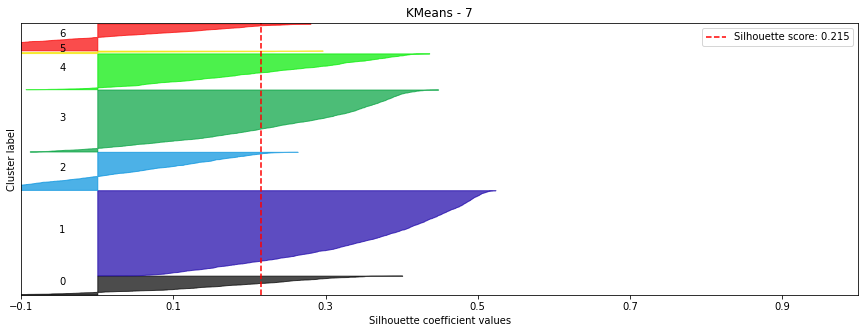

In [49]:
#Find the silhouette score with K-Means 7. 
skplot.metrics.plot_silhouette(sb2,k7_labs , title="KMeans - 7", figsize=(15,5))
plt.show()

In [50]:
#Fit the PCA model and applies.
snp = StandardScaler().fit_transform(bank_num2)
pca = PCA()
pcs = pca.fit_transform(snp)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


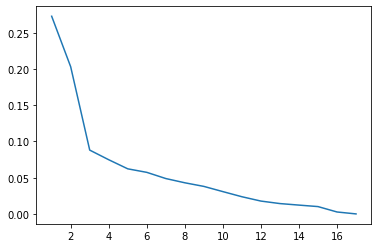

In [51]:
#The attribute shows how much variance is explained by each of individual components
varexp = pca.explained_variance_ratio_
type(varexp)
varexp.shape
varexp

sns.lineplot(range(1, len(varexp)+1), varexp)
plt.show()

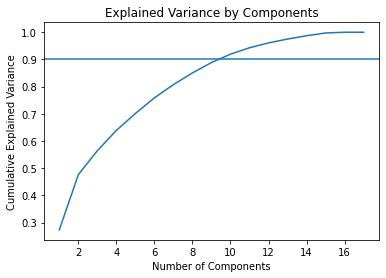

In [52]:
plt.title("Cumulative Explained Variance")
plt.plot(range(1, len(varexp)+1), np.cumsum(varexp))
plt.axhline(.90)
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [56]:
# I am going to choose components 9 seems the right choice according to the previous graph which explain 90% of our dataset. 
pca = PCA(n_components = 9)
#Fit the model
pca.fit(snp)

pca_score = pca.transform(snp)
pca_score.shape

(8949, 9)

In [57]:
#K mean clustering with PCA
kmean_pca = KMeans(n_clusters=5)
kmean_pca.fit(pca_score)
kmean_pca_lab5 = kmean_pca.predict(pca_score)

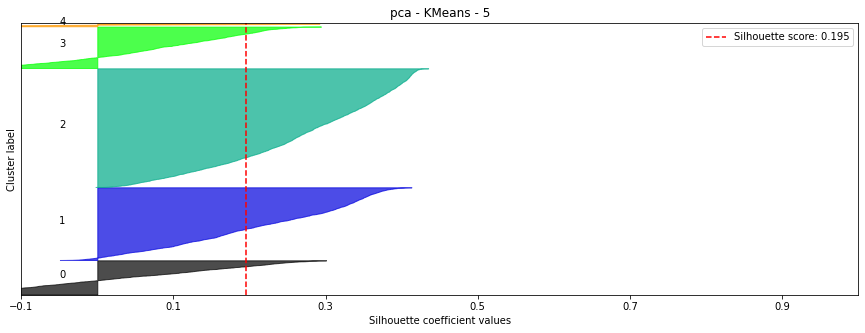

In [58]:
#Find the silhouette score with K-Means 5 with PCA.
skplot.metrics.plot_silhouette(snp,kmean_pca_lab5 , title="pca - KMeans - 5", figsize=(15,5))
plt.show()

In [59]:
#K mean clustering with PCA
kmean_pca = KMeans(n_clusters=9)
kmean_pca.fit(pca_score)
kmean_pca_lab9 = kmean_pca.predict(pca_score)

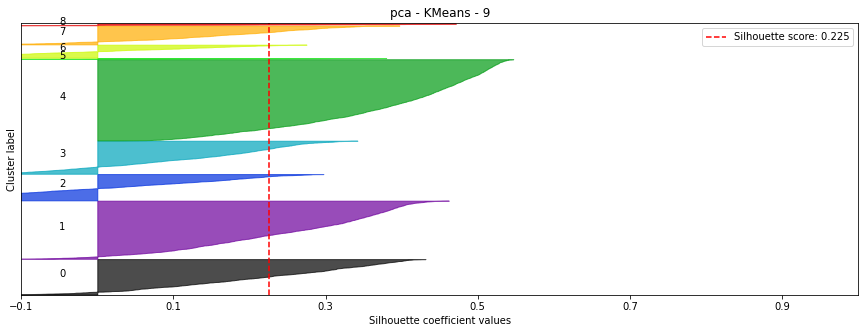

In [60]:
#Find the silhouette score with K-Means 9 with PCA.
skplot.metrics.plot_silhouette(snp,kmean_pca_lab9 , title="pca - KMeans - 9", figsize=(15,5))
plt.show()

In [61]:
#K mean clustering with PCA.
kmean_pca = KMeans(n_clusters=7)
kmean_pca.fit(pca_score)
kmean_pca_lab7 = kmean_pca.predict(pca_score)

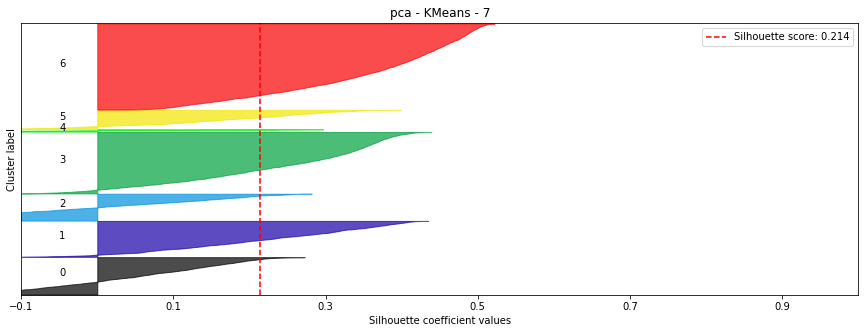

In [62]:
#Find the silhouette score with K-Means 7 with PCA.
skplot.metrics.plot_silhouette(snp,kmean_pca_lab7 , title="pca - KMeans - 7", figsize=(15,5))
plt.show()

In [63]:
#K mean clustering with PCA.
kmean_pca = KMeans(n_clusters=4)
kmean_pca.fit(pca_score)
kmean_pca_lab4 = kmean_pca.predict(pca_score)

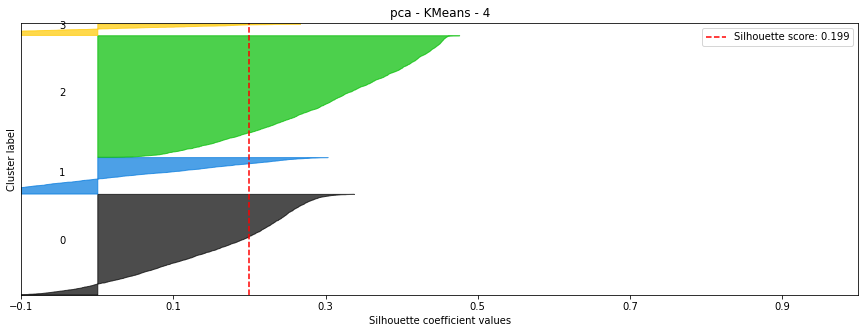

In [64]:
#Find the silhouette score with K-Means 4 with PCA.
skplot.metrics.plot_silhouette(snp,kmean_pca_lab4 , title="pca - KMeans - 4", figsize=(15,5))
plt.show()

In [65]:
#K mean clustering with PCA.
kmean_pca = KMeans(n_clusters=6)
kmean_pca.fit(pca_score)
kmean_pca_lab6 = kmean_pca.predict(pca_score)

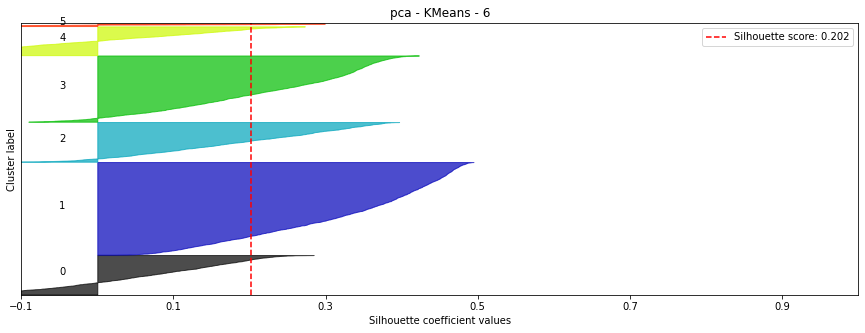

In [66]:
#Find the silhouette score with K-Means 6 with PCA.
skplot.metrics.plot_silhouette(snp,kmean_pca_lab6 , title="pca - KMeans - 6", figsize=(15,5))
plt.show()

In [67]:
#Profile the cluster solutions
bank_num2['pca-kmean4'] = kmean_pca_lab4
clus_profile_mean = bank_num2.groupby('pca-kmean4').mean()
clus_profile_mean.T

pca-kmean4,0,1,2,3
balance,905.137332,4562.747828,1010.372074,3720.911889
balance_frequency,0.938402,0.968599,0.789157,0.987588
purchases,1274.425174,488.975227,277.500553,8047.946933
oneoff_purchases,613.528453,308.972200,213.771258,5388.671360
installments_purchases,661.173483,180.087122,63.992805,2660.875573
cash_advance,209.764470,4501.739275,581.846368,730.862744
purchases_frequency,0.890712,0.284906,0.178316,0.944893
oneoff_purchases_frequency,0.304862,0.137463,0.087144,0.740481
purchases_installments_frequency,0.717756,0.183345,0.087503,0.781511
cash_advance_frequency,0.042809,0.482772,0.112783,0.075976


In [68]:
clus_profile_median = bank_num2.groupby('pca-kmean4').median()
clus_profile_median.T

pca-kmean4,0,1,2,3
balance,341.971886,4222.928545,750.070967,2716.486670
balance_frequency,1.000000,1.000000,1.000000,1.000000
purchases,924.470000,80.000000,84.050000,6091.510000
oneoff_purchases,184.260000,0.000000,0.000000,3884.100000
installments_purchases,461.680000,0.000000,0.000000,1892.380000
cash_advance,0.000000,3639.817554,104.521972,0.000000
purchases_frequency,1.000000,0.083333,0.083333,1.000000
oneoff_purchases_frequency,0.166667,0.000000,0.000000,0.833333
purchases_installments_frequency,0.833333,0.000000,0.000000,1.000000
cash_advance_frequency,0.000000,0.500000,0.083333,0.000000


In [69]:
bank_num2['pca-kmean7'] = kmean_pca_lab7
clus_profile_mean = bank_num2.groupby('pca-kmean7').mean()
clus_profile_mean.T

pca-kmean7,0,1,2,3,4,5,6
balance,1898.099100,110.069007,5003.041502,769.119071,4501.239524,876.654003,1590.610266
balance_frequency,0.979658,0.372197,0.970935,0.955932,0.975196,0.795688,0.973939
purchases,3050.300684,340.484870,569.639664,950.654139,16231.873333,393.361530,267.219111
oneoff_purchases,2141.607273,209.868025,340.874843,203.898537,11050.770741,244.646167,216.156585
installments_purchases,908.693411,130.865213,228.878546,747.486169,5181.102593,149.188549,51.235682
cash_advance,343.671005,308.893105,5172.246741,190.607951,1000.029225,1127.274533,754.063550
purchases_frequency,0.929741,0.272125,0.308680,0.885152,0.925720,0.412696,0.170027
oneoff_purchases_frequency,0.764604,0.074403,0.144688,0.103556,0.764927,0.120452,0.102637
purchases_installments_frequency,0.577989,0.190936,0.206733,0.828982,0.777273,0.274609,0.069554
cash_advance_frequency,0.055132,0.031199,0.516708,0.038003,0.076132,0.197258,0.151406


In [70]:
bank_num2['pca-kmean7'] = kmean_pca_lab7
clus_profile_median = bank_num2.groupby('pca-kmean7').median()
clus_profile_median.T

pca-kmean7,0,1,2,3,4,5,6
balance,933.622145,24.297113,4773.924535,273.774488,2997.977825,504.434705,1256.247280
balance_frequency,1.000000,0.363636,1.000000,1.000000,1.000000,0.857143,1.000000
purchases,2607.880000,169.240000,117.865000,691.890000,12375.000000,169.770000,56.850000
oneoff_purchases,1680.700000,0.000000,0.000000,0.000000,9689.360000,0.000000,0.000000
installments_purchases,582.810000,21.990000,0.000000,530.020000,4266.940000,0.000000,0.000000
cash_advance,0.000000,0.000000,4268.115914,0.000000,0.000000,470.667356,280.309428
purchases_frequency,1.000000,0.200000,0.090909,1.000000,1.000000,0.333333,0.083333
oneoff_purchases_frequency,0.833333,0.000000,0.000000,0.000000,0.916667,0.000000,0.000000
purchases_installments_frequency,0.666667,0.083333,0.000000,0.916667,0.916667,0.000000,0.000000
cash_advance_frequency,0.000000,0.000000,0.500000,0.000000,0.000000,0.142857,0.083333


In [71]:
clus_number=clus_profile_median.loc[:,['balance', 'purchases', 'oneoff_purchases', 'installments_purchases'
, 'cash_advance', 'credit_limit', 'payments', 'minimum_payments']]

clus_freq=clus_profile_median.loc[:,['balance_frequency', 'purchases_frequency', 'oneoff_purchases_frequency', 
                                 'purchases_installments_frequency', 'cash_advance_frequency', 'prc_full_payment']]

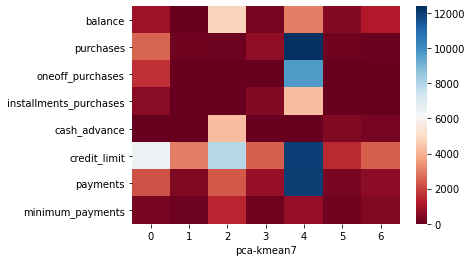

In [72]:
sns.heatmap(clus_number.T, cmap='RdBu');

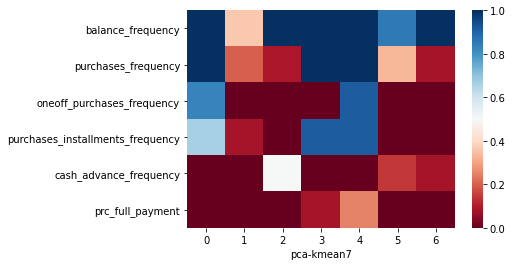

In [73]:
sns.heatmap(clus_freq.T, cmap='RdBu');

In [74]:
bank_num2['pca-kmean7'] = kmean_pca_lab7
clus_profile_std = bank_num2.groupby('pca-kmean7').std()
clus_profile_std.T

pca-kmean7,0,1,2,3,4,5,6
balance,2303.879977,243.916184,2854.456274,1056.620738,3960.390410,1114.448901,1320.286370
balance_frequency,0.071348,0.197643,0.087847,0.102301,0.095444,0.235289,0.071651
purchases,1990.081373,470.700553,1016.800463,788.939712,8777.290161,612.079140,457.547762
oneoff_purchases,1669.581817,446.355230,705.629594,373.132999,9110.509509,558.481811,428.909756
installments_purchases,1077.485781,217.299800,529.512635,683.098962,4461.815081,271.351736,142.662613
cash_advance,857.276968,826.634716,3889.255769,561.575167,3241.312053,1533.202619,1018.179331
purchases_frequency,0.129264,0.253840,0.366128,0.146571,0.182118,0.394612,0.206228
oneoff_purchases_frequency,0.244593,0.120692,0.233416,0.160961,0.306669,0.207856,0.161557
purchases_installments_frequency,0.391832,0.258837,0.330491,0.197075,0.325871,0.352447,0.139212
cash_advance_frequency,0.113704,0.065388,0.228816,0.093416,0.193738,0.219819,0.151136


In [75]:
bank_num2['pca-kmean6'] = kmean_pca_lab6
clus_profile_mean = bank_num2.groupby('pca-kmean6').mean()
clus_profile_mean.T

pca-kmean6,0,1,2,3,4,5
balance,1888.952622,1558.009833,117.091578,707.456807,4859.411249,4501.239524
balance_frequency,0.978653,0.966458,0.376045,0.950597,0.965969,0.975196
purchases,2985.732957,264.405073,329.028196,889.405725,565.252320,16231.873333
oneoff_purchases,2082.749939,216.813053,208.397733,183.663971,342.681003,11050.770741
installments_purchases,902.983018,47.752748,120.855481,706.556511,222.677555,5181.102593
cash_advance,334.800436,804.762845,336.264525,201.337380,5094.992458,1000.029225
purchases_frequency,0.927375,0.163982,0.268520,0.881565,0.310904,0.925720
oneoff_purchases_frequency,0.751252,0.100876,0.077446,0.095881,0.146931,0.764927
purchases_installments_frequency,0.581854,0.064851,0.182782,0.817303,0.204506,0.777273
cash_advance_frequency,0.054767,0.160996,0.038252,0.041456,0.516141,0.076132


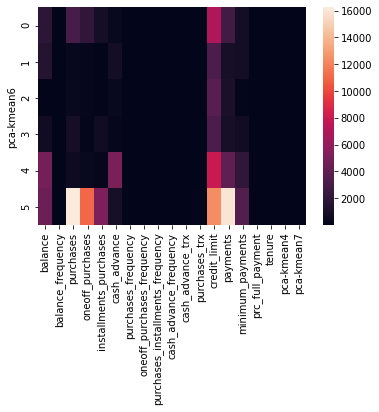

In [76]:
sns.heatmap(clus_profile_mean)